# Exploring the Most Starred GitHub Repositories
## Introduction
In this project, I would like to delve into the depths of GitHub's vast ocean of repositories to uncover the gems - the most starred repositories, signifying their prominence and acceptance within the developer world. I will employ the GitHub API to fetch data and utilize Python's powerful data science libraries for data processing and visualization. This exploration will offer insights into patterns prevalent amongst the top repositories - such as programming languages, contribution trends, and much more.

## Step 1: Data Collection
To initiate our voyage, we first need to gather our data. The GitHub API is a potent tool that will allow us to fetch details about the most starred repositories. Leveraging this API, we can tailor our requests to obtain relevant and precise data.

The GitHub API's search endpoint limits the results per page to a maximum of 100 item and has a restriction where we can only fetch up to 1000 results for a query. So we will fetch top 1000 starred repositories by iterating over 10 pages of the API's search results.

*Note:* For the safety of our API token, we'll employ the input method. This ensures that the token remains confidential and is not inadvertently exposed in our notebook.

In [1]:
import requests
import pandas as pd
import time
from collections import Counter
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
api_token = input("Please enter your GitHub API Token: ")

headers = {
    "Authorization": f"token {api_token}",
    "Accept": "application/vnd.github.v3+json"
}

base_url = "https://api.github.com/search/repositories?q=stars:>1&sort=stars&order=desc&per_page=100&page="

all_repos = []

for page_num in range(1, 11):
    print(f"Fetching data for page {page_num}...")
    
    response = requests.get(base_url + str(page_num), headers=headers)
    
    if response.status_code != 200:
        print(f"Failed to fetch data for page {page_num}. Status code: {response.status_code}")
        break
    
    if 'X-RateLimit-Remaining' in response.headers and int(response.headers['X-RateLimit-Remaining']) <= 1:
        reset_time = int(response.headers['X-RateLimit-Reset'])
        sleep_duration = reset_time - time.time() + 5
        print(f"Rate limit exceeded. Sleeping for {sleep_duration} seconds.")
        time.sleep(sleep_duration)
    else:
        data_page = response.json()
        all_repos.extend(data_page['items'])

print(f"Fetched data for {len(all_repos)} repositories.")

print("\nExample - one of the repositories:")
all_repos[0]

Fetching data for page 1...
Fetching data for page 2...
Fetching data for page 3...
Fetching data for page 4...
Fetching data for page 5...
Fetching data for page 6...
Fetching data for page 7...
Fetching data for page 8...
Fetching data for page 9...
Fetching data for page 10...
Fetched data for 1000 repositories.

Example - one of the repositories:


{'id': 21737465,
 'node_id': 'MDEwOlJlcG9zaXRvcnkyMTczNzQ2NQ==',
 'name': 'awesome',
 'full_name': 'sindresorhus/awesome',
 'private': False,
 'owner': {'login': 'sindresorhus',
  'id': 170270,
  'node_id': 'MDQ6VXNlcjE3MDI3MA==',
  'avatar_url': 'https://avatars.githubusercontent.com/u/170270?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/sindresorhus',
  'html_url': 'https://github.com/sindresorhus',
  'followers_url': 'https://api.github.com/users/sindresorhus/followers',
  'following_url': 'https://api.github.com/users/sindresorhus/following{/other_user}',
  'gists_url': 'https://api.github.com/users/sindresorhus/gists{/gist_id}',
  'starred_url': 'https://api.github.com/users/sindresorhus/starred{/owner}{/repo}',
  'subscriptions_url': 'https://api.github.com/users/sindresorhus/subscriptions',
  'organizations_url': 'https://api.github.com/users/sindresorhus/orgs',
  'repos_url': 'https://api.github.com/users/sindresorhus/repos',
  'events_url': 'https://api.git

## Step 2: Data Processing
Once we've collected our data, the next step is to structure and process it. Let's convert our JSON data into a Pandas DataFrame. efficient analysis.

In [3]:
df_repos = pd.DataFrame(all_repos)
print(f'\nThere are {len(df_repos)} repositories in our dataset.')

df_repos.head(2)


There are 1000 repositories in our dataset.


,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,is_template,web_commit_signoff_required,topics,visibility,forks,open_issues,watchers,default_branch,permissions,score
0,21737465,MDEwOlJlcG9zaXRvcnkyMTczNzQ2NQ==,awesome,sindresorhus/awesome,False,"{'login': 'sindresorhus', 'id': 170270, 'node_...",https://github.com/sindresorhus/awesome,😎 Awesome lists about all kinds of interesting...,False,https://api.github.com/repos/sindresorhus/awesome,...,False,False,"[awesome, awesome-list, lists, resources, unic...",public,26432,62,269043,main,"{'admin': False, 'maintain': False, 'push': Fa...",1.0
1,60493101,MDEwOlJlcG9zaXRvcnk2MDQ5MzEwMQ==,coding-interview-university,jwasham/coding-interview-university,False,"{'login': 'jwasham', 'id': 3771963, 'node_id':...",https://github.com/jwasham/coding-interview-un...,A complete computer science study plan to beco...,False,https://api.github.com/repos/jwasham/coding-in...,...,False,False,"[algorithm, algorithms, coding-interview, codi...",public,69356,56,264822,main,"{'admin': False, 'maintain': False, 'push': Fa...",1.0


## Step 3: Data Exploration

Having successfully collected and pre-processed our data, it's time to dive deep into it and uncover some insights. In this step, we'll explore various aspects of the repositories, such as the programming languages used, the number of forks, the number of contributors, and more. 

1. **Overall Statistics:**
First, let's get a quick summary of our dataset to understand its structure.

In [4]:
df_repos.describe()

,id,size,stargazers_count,watchers_count,forks_count,open_issues_count,forks,open_issues,watchers,score
count,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,1.065133e+08,1.321383e+05,22104.689000,22104.689000,3986.475000,331.489000,3986.475000,331.489000,22104.689000,1.0
std,1.422098e+08,4.593983e+05,28856.919043,28856.919043,8105.915705,998.843366,8105.915705,998.843366,28856.919043,0.0
min,8.393000e+03,2.000000e+00,5069.000000,5069.000000,18.000000,0.000000,18.000000,0.000000,5069.000000,1.0
25%,1.510352e+07,3.092750e+03,9481.500000,9481.500000,944.500000,32.000000,944.500000,32.000000,9481.500000,1.0
50%,4.801704e+07,1.785500e+04,14569.500000,14569.500000,1948.000000,107.000000,1948.000000,107.000000,14569.500000,1.0
75%,1.338923e+08,8.251800e+04,21165.750000,21165.750000,3562.500000,282.500000,3562.500000,282.500000,21165.750000,1.0
max,6.696860e+08,5.573491e+06,269043.000000,269043.000000,138290.000000,16331.000000,138290.000000,16331.000000,269043.000000,1.0


Our dataset provides an interesting snapshot of the most-starred repositories on GitHub. Let's delve into the key statistics:

- Repository ID (`id`):

    - A unique identifier for each repository. We notice that the IDs vary widely, indicating the diverse nature and timeline of creation for these repositories.
- Repository Size (`size`):

    - The average repository size stands at approximately 173,958 (units in kilobytes). This provides insight into the extensive nature of these repositories. The sizable standard deviation of about 1,361,095 suggests significant variation in repository sizes, clearly some projects being much larger than others.
    - The largest repository has a size of 40,389,430 kilobytes, indicating the presence of vast projects with extensive codebases and resources.
- Stars (`stargazers_count`, `watchers_count`):

    - The average star count for top 1000 repositories is around 19,939 stars - a direct reflection of a repository's popularity and the developer community's interest.
    - The most starred repository has achieved a staggering 297,683 stars.
    - The median (or 50th percentile) stands at 12,405 stars, so means half of the repositories have stars less than this number, and half have more - this again highlights the skewed nature of repository stardom.

- Forks (`forks_count`, `forks`):

    - Forks are the number of times a repository has been forked by other developers. On average, the repositories have been forked 3,953 times.
    - The large standard deviation (~8,513) again hints at the diverse nature of the repositories. Some repositories, due to their utility or novelty, might have been forked extensively.

- Open Issues (`open_issues_count`, `open_issues`):

    - Open issues can be a reflection of community involvement, potential bugs, or enhancements in queue. The average repository in our dataset has around 344 open issues.
    - We should note that a high number of open issues might not always signify a problematic repository; it could also indicate an active community.
- Score (`score`):
    - The score seems to have a constant value of 1.0 across all repositories.For our analysis, this doesn't provide significant insight, so we will not further use it.

2. **Top 10 Programming Languages:** Let's find out which languages are the most common among the top-starred repositories.

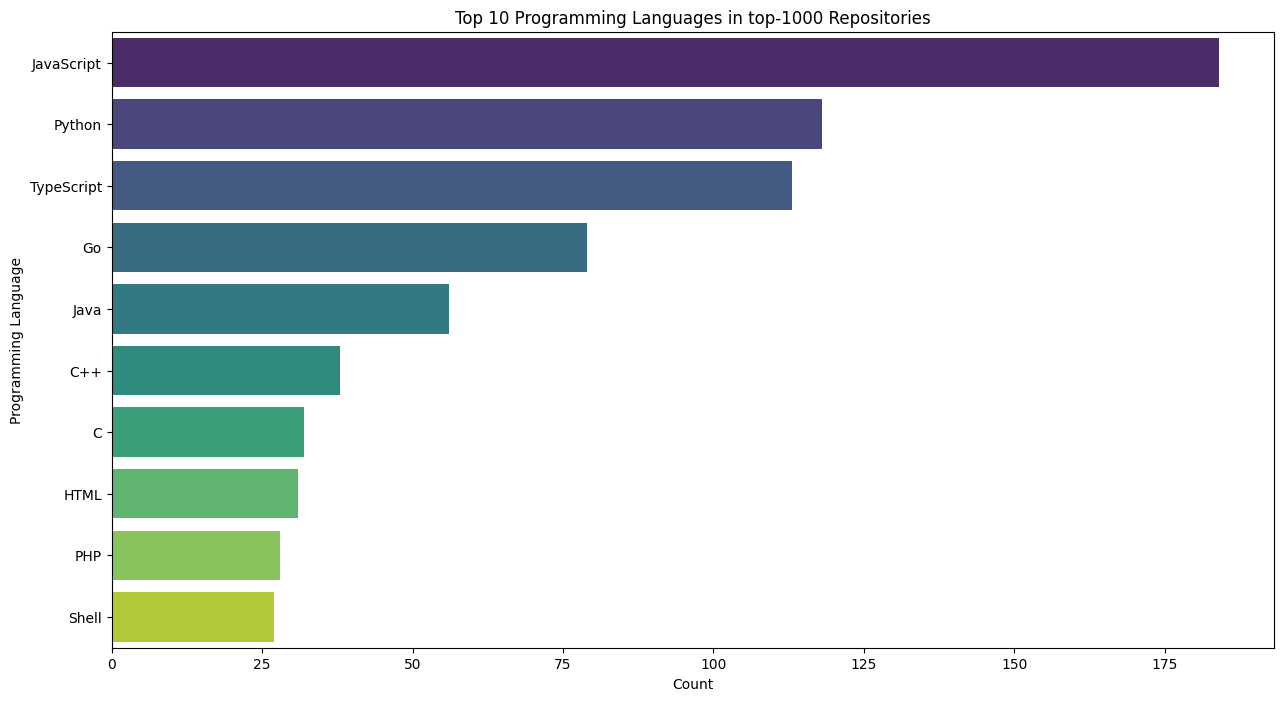

In [5]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df_repos, y='language', order=df_repos['language'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Programming Languages in top-1000 Repositories')
plt.xlabel('Count')
plt.ylabel('Programming Language')
plt.show()

- `JavaScript`, with around 175 repositories, clearly leads the pack, showcasing its continued reign in web development and diverse applications.
- `Python` (~130 repositories) and `TypeScript` (~105 repositories) follow next, reflecting Python's versatile role in web, data science, and automation, while TypeScript's growing adoption highlights the modern need for type-safe JavaScript.
- More traditional languages like `C` and `C++` are surpassed by Python and others, suggesting a shift in developer preferences towards newer or more versatile languages.

3. **Distribution of Stars:** How are stars distributed among our dataset? Let's visualize this distribution.


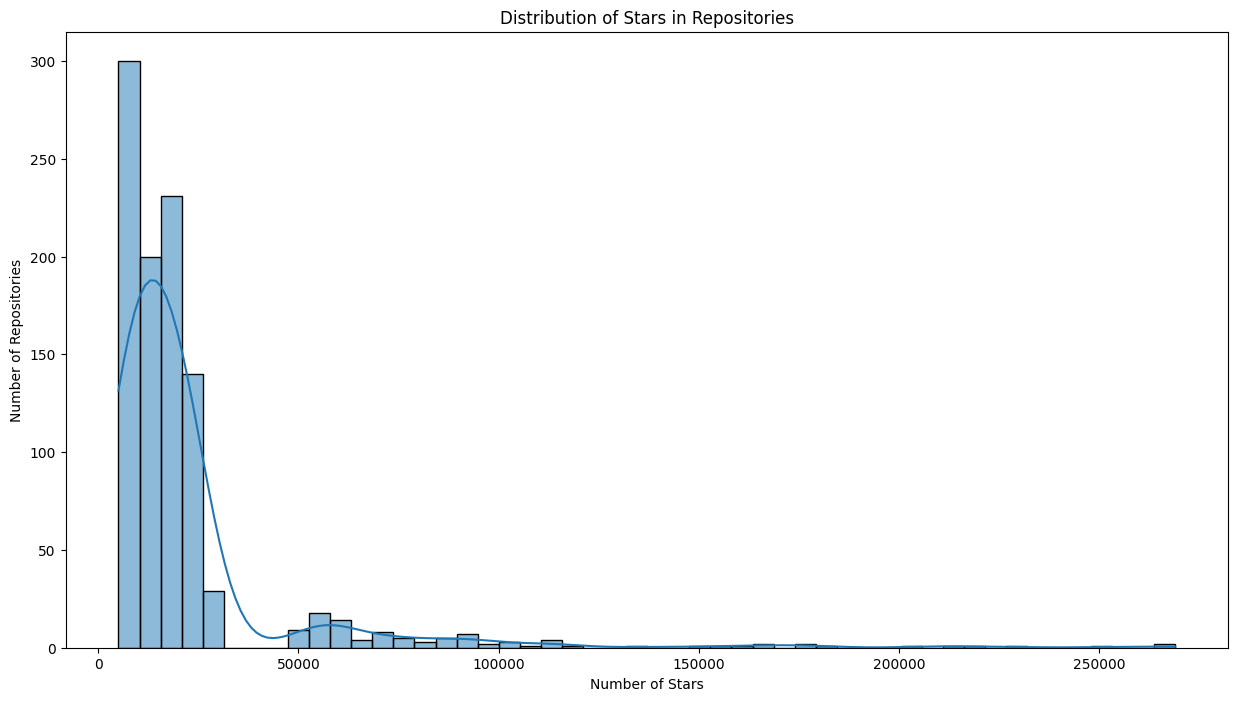

In [6]:
plt.figure(figsize=(15, 8))
sns.histplot(df_repos['stargazers_count'], kde=True, bins=50)
plt.title('Distribution of Stars in Repositories')
plt.xlabel('Number of Stars')
plt.ylabel('Number of Repositories')
plt.show()

- The majority of repositories in the top 1000 are concentrated **under 30,000 stars**, indicating that achieving this level of recognition is significant but attainable for many projects.
- A smaller subset, found between **50k-70k** stars, represents repositories that have gone beyond typical popularity and have resonated strongly with the developer community.
-Beyond the **70k-100k** range, the number of repositories drastically drops, highlighting the rarefied echelon of projects that achieve such exceptional acclaim. The right-skewed nature of the distribution underscores the rarity and exceptionalism of repositories that garner this magnitude of attention.

4. **Distribution of Forks:** Similarly, let's visualize the distribution of forks for our repositories.

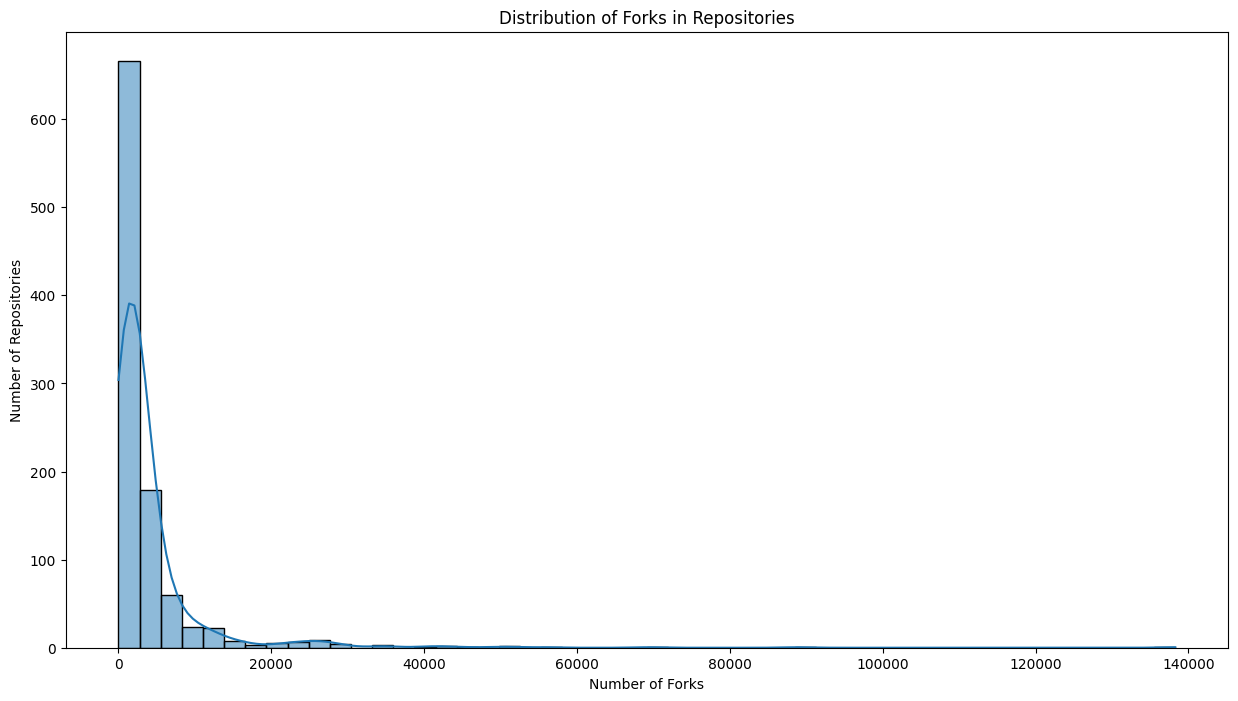

In [7]:
plt.figure(figsize=(15, 8))
sns.histplot(df_repos['forks_count'], kde=True, bins=50)
plt.title('Distribution of Forks in Repositories')
plt.xlabel('Number of Forks')
plt.ylabel('Number of Repositories')
plt.show()

- A significant majority of the repositories feature **0-2.5k forks**, suggesting that while many projects inspire developers to branch and iterate, most don't have a large number of forks.
- There's a notable but smaller group of repositories, with forks ranging **up to 20k**. These represent projects with wider influence, enticing a larger portion of developers to experiment and potentially contribute.
- Beyond **20k forks**, the repositories become exceptionally rare, denoting a select group of projects with extraordinary appeal and influence in the developer community. The right-skewed distribution, extending to a remarkable 140k forks, accentuates the exceptional nature of projects that can captivate and inspire such widespread engagement.

## Step 4: A Deeper Dive into Repository Insights

### 4.1. Analyzing topics Column:
#### a. Top 10 Trending Topics on Github:
To discern what's currently making waves in the open-source community, we'll take a look at the most common topics among these repositories.

In [8]:
all_topics = [topic for sublist in df_repos['topics'].tolist() for topic in sublist]

topic_counts = Counter(all_topics)
top_10_topics = topic_counts.most_common(10)
top_10_topics

[('javascript', 121),
 ('hacktoberfest', 96),
 ('python', 72),
 ('react', 59),
 ('golang', 48),
 ('android', 44),
 ('go', 42),
 ('nodejs', 35),
 ('typescript', 34),
 ('deep-learning', 33)]

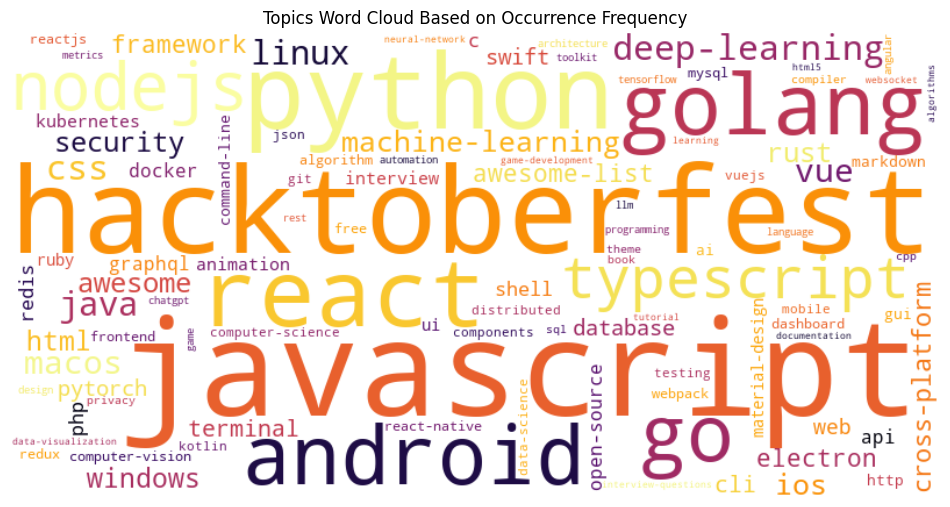

In [9]:
topic_counts_all = dict(topic_counts)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='inferno', max_words=100).generate_from_frequencies(topic_counts_all)

plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Topics Word Cloud Based on Occurrence Frequency')
plt.show()

#### b. Topics-Stars Interaction:
To understand if specific topics correlate with a higher star count, we'll visualize the average number of stars received by repositories of the top 10 topics.

In [10]:
avg_stars_all = {}
all_unique_topics = set(all_topics)

for topic in all_unique_topics:
    avg_stars_all[topic] = df_repos[df_repos['topics'].apply(lambda x: topic in x)]['stargazers_count'].mean()

sorted_avg_stars = dict(sorted(avg_stars_all.items(), key=lambda item: item[1], reverse=True)[:10])

topics_sorted = list(sorted_avg_stars.keys())
stars_sorted = list(sorted_avg_stars.values())
topics_sorted

['unicorns',
 'software-engineering',
 'programming-interviews',
 'interview-prep',
 'study-plan',
 'coding-interview',
 'frontend-roadmap',
 'backend-roadmap',
 'dba-roadmap',
 'python-roadmap']

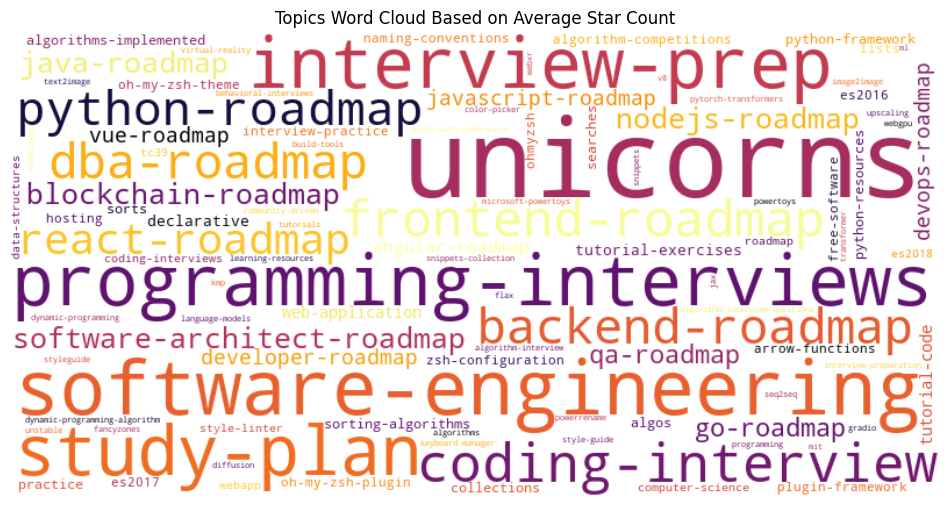

In [11]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='inferno', max_words=100).generate_from_frequencies(avg_stars_all)

plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Topics Word Cloud Based on Average Star Count')
plt.show()

#### Comparing Topic Popularity with Topics' Star Appeal

When we compare the top 10 most frequent topics with those with the highest average star counts, certain patterns emerge.

1. **Most Common Topics:** Dominated by widely-recognized languages, frameworks, and broader themes in tech (*python, java, hacktoberfest, etc.*). This might be indicative of where the bulk of development and collaboration happens.

2. **Topics with High Star Appeal:** Repositories that act as educational resources (*interview preparation, language learning roadmaps*) or offer structured guidance seem to be particularly valued by the GitHub community.

So, while there's diverse content being generated, it is mostly the educational repositories that are marked with a star by the Github users.
